CMSC 197 - Machine Learning HW2 <br>
Guides, Emmanuel Tarek Shayne

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [138]:
# %matplotlib inline

In [139]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [140]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


In [141]:
# Printing all columns for reference
list(data.columns)

['Unnamed: 0',
 'movie_title',
 'color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [142]:
# Start at index 1 since index 0 is director '0'
top_directors = data.groupby('director_name')['director_name'].count().sort_values(ascending=False)[1:11]

print(f'Below is the list of all the top directors with most movies directed, with their respective number of movies:\n\n{top_directors}')

Below is the list of all the top directors with most movies directed, with their respective number of movies:

director_name
Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
Steven Soderbergh    16
Spike Lee            16
Tim Burton           16
Renny Harlin         15
Oliver Stone         14
Name: director_name, dtype: int64


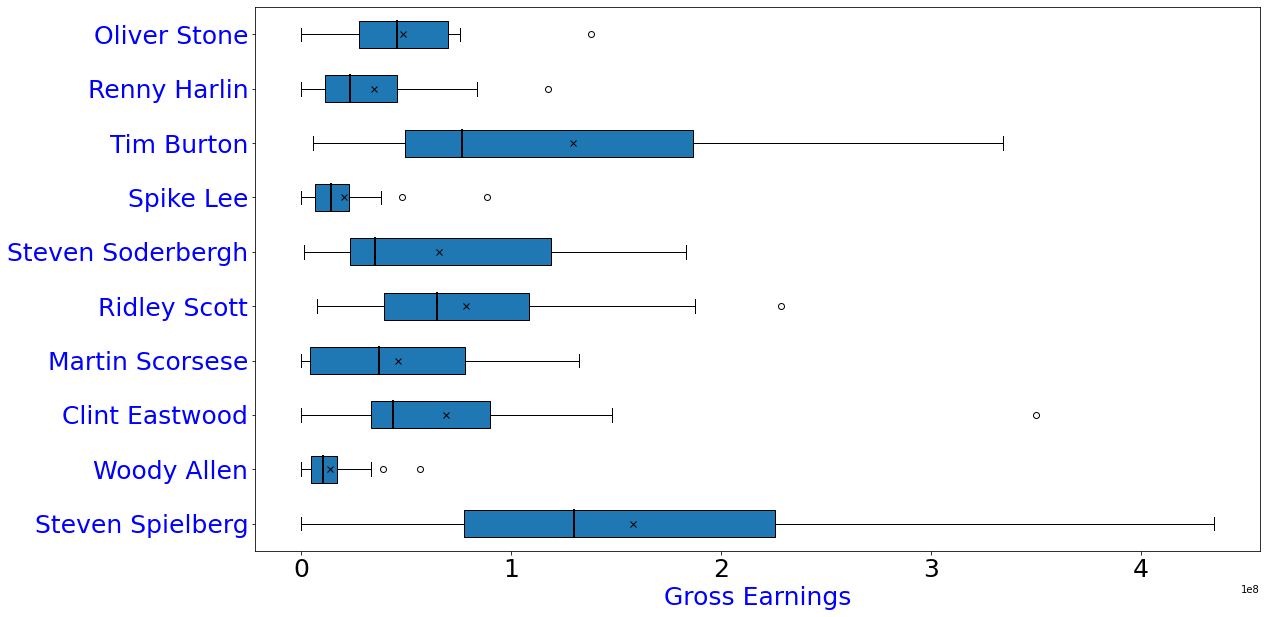

In [143]:
# Getting all top 10 directors' names
top_directors_names = top_directors.index

# Getting all of the directors' earnings
earnings = []
for i in top_directors_names:
    earnings.append(data[data['director_name'] == i]['gross'].values)

# Plotting them in a box plot
plt.figure(figsize=(18,10))
box = plt.boxplot(earnings, vert=False, patch_artist=True, \
                  showmeans = True, meanprops={"marker":"x", "markeredgecolor":"black"})
for median in box['medians']:
    median.set_color('black')
    median.set_linewidth(2)

plt.yticks(range(1,11), top_directors_names, rotation=0, color='blue', fontsize = 25)
plt.xticks(color='black', fontsize = '25')
plt.xlabel('Gross Earnings', color = 'blue', fontsize=25)
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

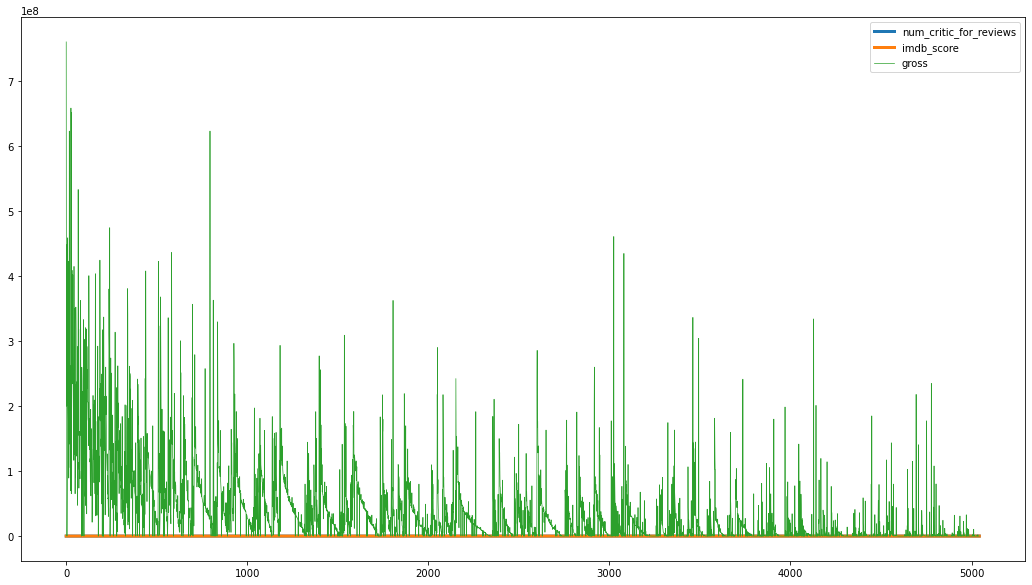

In [144]:
plt.figure(figsize=(18,10))

# plotting every required column/attribute directly
plt.plot(data['num_critic_for_reviews'], linewidth = 3, label = 'num_critic_for_reviews')
plt.plot(data['imdb_score'], linewidth = 3, label = 'imdb_score')
plt.plot(data['gross'], linewidth = 0.7, label = 'gross')
plt.legend(loc = 'upper right')
plt.show()

# Some plots may not show since 'gross' are in millions compared to the other two

## Compute Sales (Gross - Budget), add it as another column

In [145]:
# Sales = Gross - Budget
data['Sales'] = data.gross - data.budget

# Display title, sales, and director name
data[['movie_title', 'Sales', 'director_name']]

,movie_title,Sales,director_name
0,b'Avatar',523505847.0,James Cameron
1,"b""Pirates of the Caribbean: At World's End""",9404152.0,Gore Verbinski
2,b'Spectre',-44925825.0,Sam Mendes
3,b'The Dark Knight Rises',198130642.0,Christopher Nolan
4,b'Star Wars: Episode VII - The Force Awakens ...,0.0,Doug Walker
...,...,...,...
5039,b'The Following ',0.0,0
5040,b'A Plague So Pleasant',-1400.0,Benjamin Roberds
5041,b'Shanghai Calling',10443.0,Daniel Hsia
5042,b'My Date with Drew',84122.0,Jon Gunn


## Which directors garnered the most total sales?

In [146]:
# Add all sales, by director_name
data['Total'] = data.groupby(['director_name'])['Sales'].transform('sum')

# drop duplicate rows
dataSales = data.drop_duplicates(subset=['director_name'])

# print director ranked by their most total sales
dataSales[['director_name', 'Total']].sort_values(by='Total', ascending = False)

,director_name,Total
54,Steven Spielberg,2.451332e+09
236,George Lucas,1.386641e+09
0,James Cameron,1.199626e+09
8,Joss Whedon,1.000887e+09
202,Chris Columbus,9.417076e+08
...,...,...
1517,Hayao Miyazaki,-2.444860e+09
3005,Lajos Koltai,-2.499804e+09
2334,Katsuhiro Ôtomo,-3.226670e+09
2994,Chan-wook Park,-4.210905e+09


## Plot sales and average likes as a scatterplot. Fit it with a line.

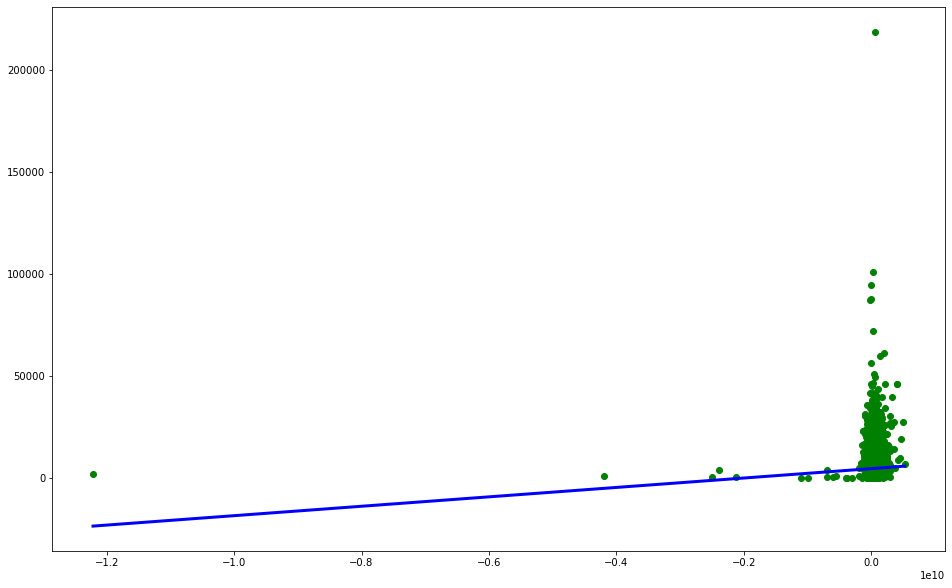

Another plot using seaborn:


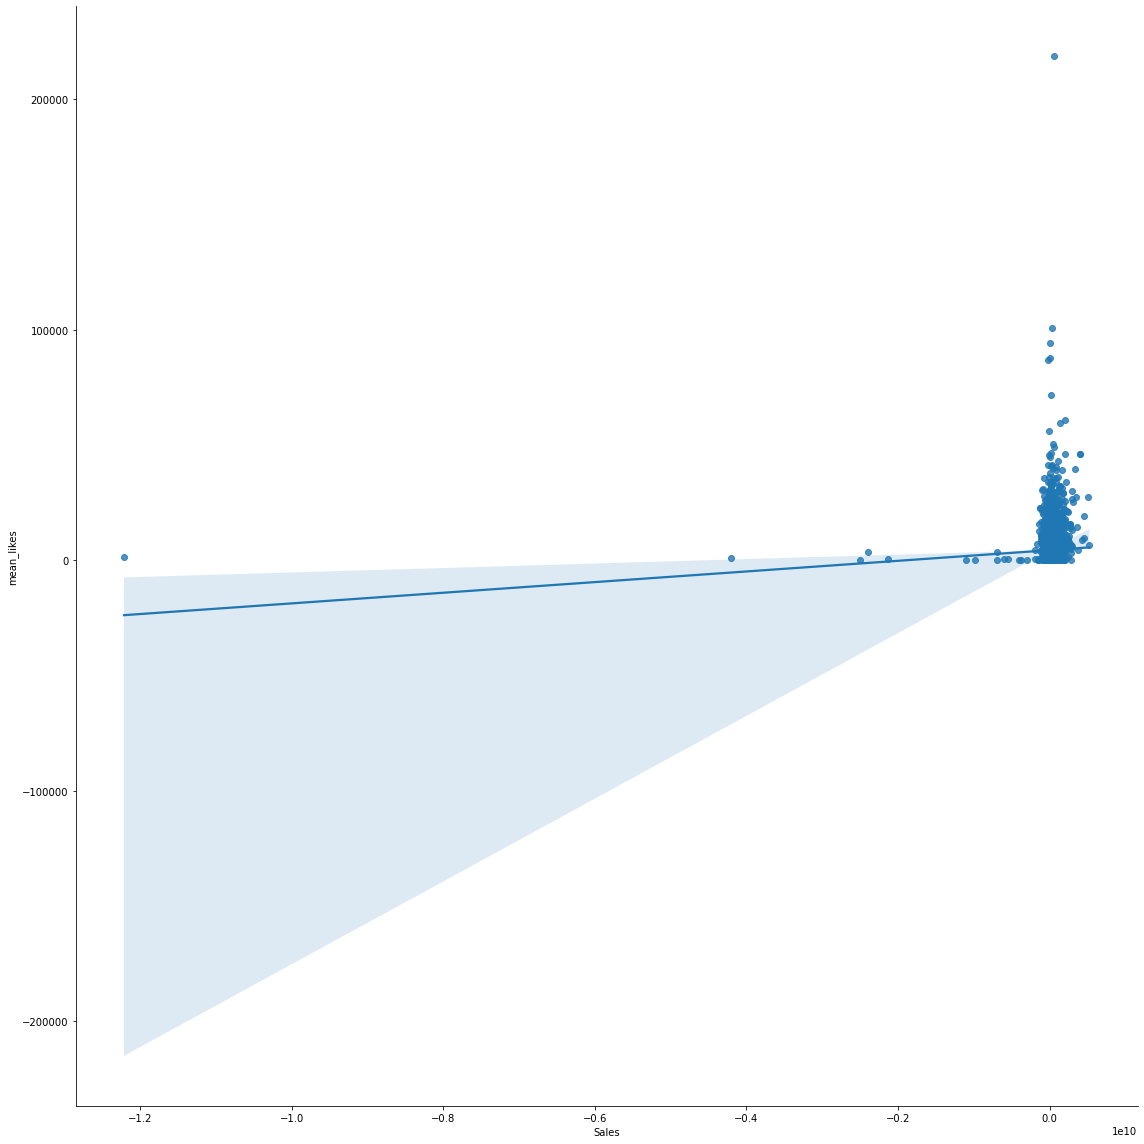

In [147]:
# polyfit is necessary to fit a line in the scatterplot
from numpy.polynomial.polynomial import polyfit
plt.figure(figsize=(16,10))

# since there are a lot of columns with likes, we will average them row-wise
data['mean_likes'] = data.filter(regex='likes').mean(axis = 1)

# Scatterplot of sales and mean_likes
plt.scatter(data['Sales'], data['mean_likes'], color = 'green')

# fitting a line in the scatterplot
plt.plot(np.unique(data['Sales']), np.poly1d(np.polyfit(data['Sales'],\
                        data['mean_likes'], 1))(np.unique(data['Sales'])), color='blue', linewidth=3)
plt.show()

print("Another plot using seaborn:")
# We can also see this using lmplot (lineplot):
other_plot = sns.lmplot(x="Sales", y="mean_likes", data=data, height=16, scatter = True)

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

In [148]:
# Initialize array of the genres we are looking for and create empty array that will contain 
# all Sales of each movie that has a genre in the desired_genres
desired_genres = ['Romance', 'Comedy', 'Action', 'Fantasy']
genre_sales = []

# iterate each genre in desired_genres and append every movie's sales that have the specified genre in its
# 'genre' column
for i in desired_genres:
    genre_sales.append(data[data['genres'].str.contains(i)]['Sales'].sum())

# since both desired_genres and genre_sales are 1:1, the index of the max value in the genre_sales
# would be the same to that of the desired_genre
most_profitable_genre = desired_genres[genre_sales.index(max(genre_sales))]

print(f"Most profitable genre is: {most_profitable_genre}, with a total of ${max(genre_sales)} in sales.")

Most profitable genre is: Comedy, with a total of $12832689231.0 in sales.


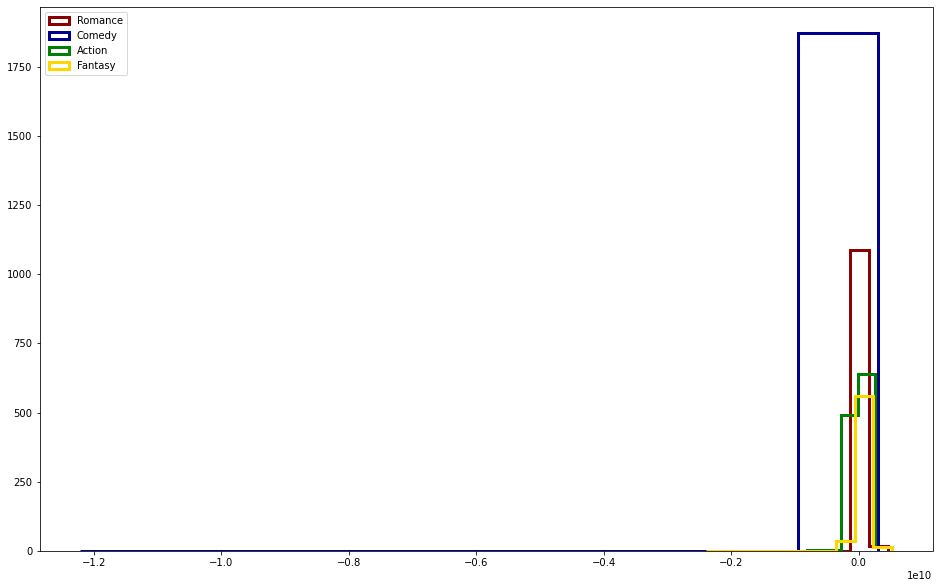

In [149]:
plt.figure(figsize=(16,10))
# plotting all of the genres together
plt.hist(data[data['genres'].str.contains('Romance')]['Sales'], label = 'Romance', histtype = 'step', linewidth = 3, color = 'DarkRed')
plt.hist(data[data['genres'].str.contains('Comedy')]['Sales'], label = 'Comedy', histtype = 'step', linewidth = 3, color = 'Darkblue')
plt.hist(data[data['genres'].str.contains('Action')]['Sales'], label = 'Action', histtype = 'step', linewidth = 3, color = 'Green')
plt.hist(data[data['genres'].str.contains('Fantasy')]['Sales'], label = 'Fantasy', histtype = 'step', linewidth = 3, color = 'Gold')
plt.legend(loc = 'upper left')
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.


Store it as a new column, average_actor_likes.

In [150]:
# compute average_actor_likes, setting axis to 1 to compute mean row-wise
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1)

# Just for display, the top 10 movies with the most average facebook actor likes are displayed below
data[['movie_title', 'average_actor_likes']].sort_values(by='average_actor_likes', ascending = False).head(10)

,movie_title,average_actor_likes
1902,b'Anchorman: The Legend of Ron Burgundy',218333.333333
1223,b'The Final Destination',100582.666667
4704,b'Treachery',94333.333333
4592,b'Hardflip',87291.666667
4409,b'Kickboxer: Vengeance',86936.000000
4045,b'Feast',55632.666667
2939,b'Quarantine',46333.333333
2269,b'Armored',45874.000000
2385,b'The Amityville Horror',40000.000000
74,b'Evan Almighty',35000.000000


## Copying the whole dataframe

In [151]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Sales,Total,mean_likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,1.199626e+09,6770.833333,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,2.586010e+08,15818.833333,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,2.758636e+08,18042.333333,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,8.082276e+08,60959.833333,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0.0,12.0,7.1,0.00,0.0,0.0,0.000000e+00,69.500000,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [152]:
# include all numeric columns to 'numerics'
numerics = df.select_dtypes(include=['float', 'int'])
# check
list(numerics)

# iterate through every column and,
for i in numerics:
    # apply the formula for x_scaled
    df[i] = ((df[i] - df[i].min()) / (df[i].max() - df[i].min()))
    
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Sales,Total,mean_likes,average_actor_likes
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,1.940158e-02,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.914846,0.030964,0.004261
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,2.455896e-02,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.850827,0.072341,0.070229
2,0.000397,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,2.005649e-02,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.852002,0.082510,0.017640
3,0.000595,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,2.046580e-02,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.888219,0.278777,0.111450
4,0.000793,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0.000000e+00,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.833234,0.000318,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,0.999207,b'The Following ',Color,0,0.052891,0.227513,0.000000,0.013870,Valorie Curry,0.001314,...,0.000000e+00,0.000000,0.004328,0.789474,1.000000,0.091691,0.958898,0.828870,0.027062,0.002676
5040,0.999405,b'A Plague So Pleasant',Color,Benjamin Roberds,0.015990,0.402116,0.000000,0.000000,Maxwell Moody,0.000000,...,1.146085e-07,0.998512,0.000000,0.663158,0.000000,0.000046,0.958898,0.833234,0.000012,0.000000
5041,0.999603,b'Shanghai Calling',Color,Daniel Hsia,0.017220,0.529101,0.000000,0.021261,Daniel Henney,0.001478,...,0.000000e+00,0.998016,0.005248,0.663158,0.146875,0.001891,0.958899,0.833235,0.003963,0.003289
5042,0.999802,b'My Date with Drew',Color,Jon Gunn,0.052891,0.476190,0.000696,0.000696,Brian Herzlinger,0.000134,...,9.004953e-08,0.994048,0.000168,0.694737,0.115625,0.001307,0.958905,0.833938,0.000579,0.000191
